In [2]:
!unzip /content/ts_files.zip -d /content/ts_files

Archive:  /content/ts_files.zip
replace /content/ts_files/ts_files/als1.ts? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/ts_files/ts_files/als10.ts? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
import pandas as pd

# Read the dataset of person 5 with ALS disease
df1 = pd.read_csv('/content/ts_files/ts_files/als5.ts', delimiter='\t', header=None)

df1.columns=['Elapsed Time', 'Left Stride', 'Right Stride', 'Left Swing', 'Right Swing', 'Left Swing %', 'Right Swing %', 'Left Stance', 'Right Stance', 'Left Stance %', 'Right Stance %', 'Double Support', 'Double Support %']

print(df.to_string())


NameError: name 'df' is not defined

In [4]:
df.iloc[-1,:]

NameError: name 'df' is not defined

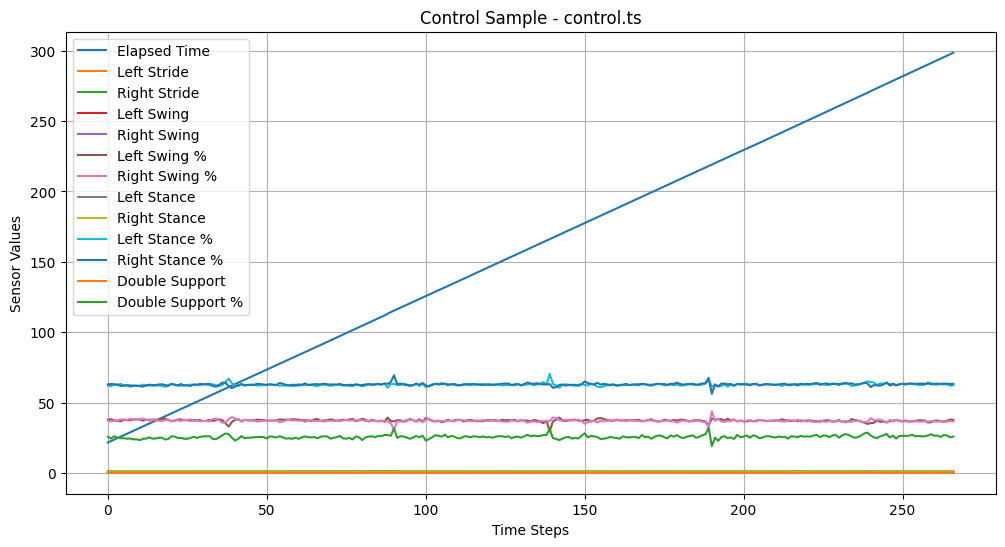

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load gait characteristics of healthy person 4 in csv format
df = pd.read_csv('/content/ts_files/ts_files/control4.ts', delimiter='\t', header=None)
df.columns=df1.columns

# Plot of 13 columns (gait values) of dataframe extracted above
plt.figure(figsize=(12, 6))

for col in df.columns:
    plt.plot(df[col], label=f'{col}')
plt.title('Control Sample - control.ts')
plt.xlabel('Time Steps')
plt.ylabel('Sensor Values')
plt.legend()

plt.grid(True)
plt.show()


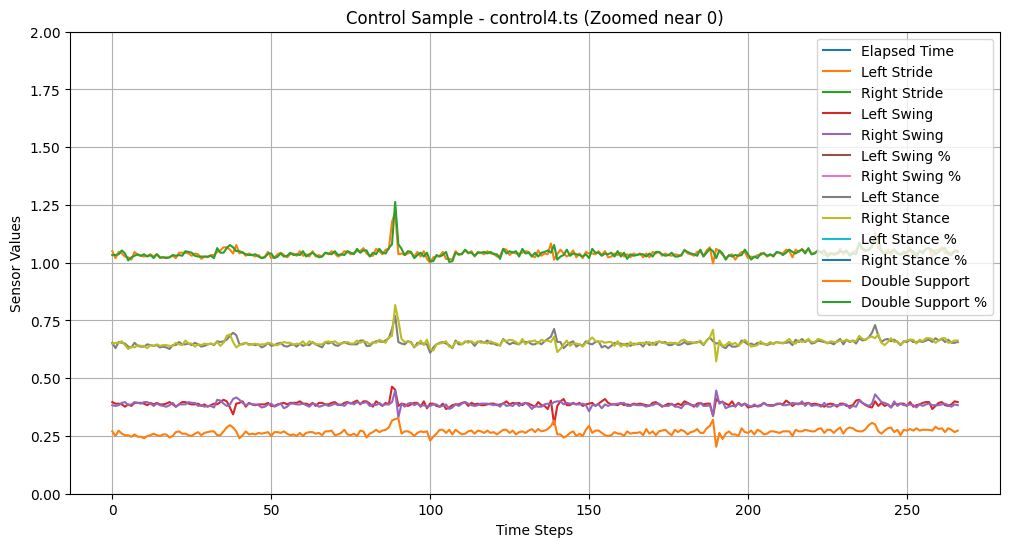

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/ts_files/ts_files/control4.ts', delimiter='\t', header=None)
df.columns=df1.columns
# Plot same as above zoomed in near 0
plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df[col], label=f'{col}')

plt.title('Control Sample - control4.ts (Zoomed near 0)')
plt.xlabel('Time Steps')
plt.ylabel('Sensor Values')
plt.ylim(0, 2)
plt.legend()
plt.grid(True)
plt.show()


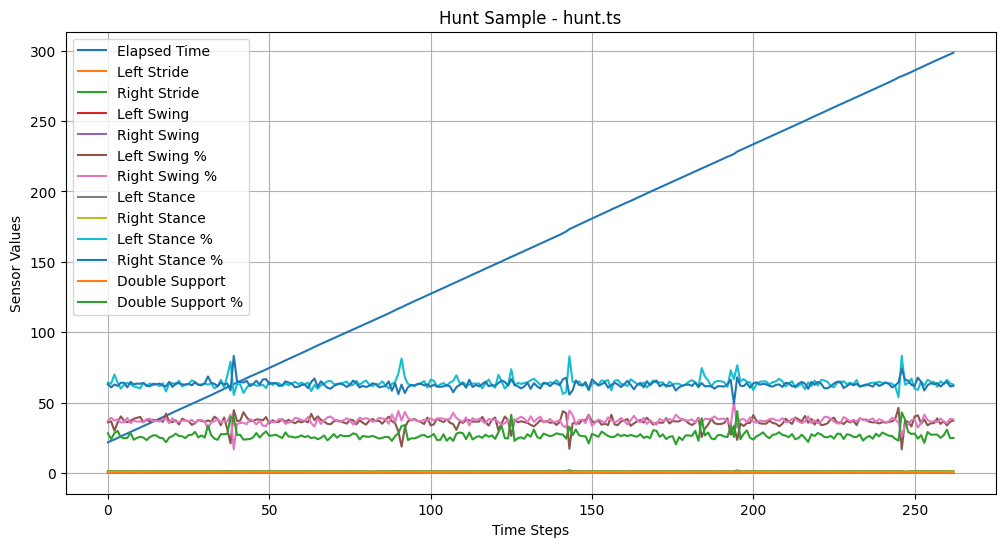

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load one signal
df = pd.read_csv('/content/ts_files/ts_files/hunt6.ts', delimiter='\t', header=None)

df.columns=df1.columns
plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df[col], label=f'{col}')
plt.title('Hunt Sample - hunt.ts')
plt.xlabel('Time Steps')
plt.ylabel('Sensor Values')
plt.legend()
plt.grid(True)
plt.show()


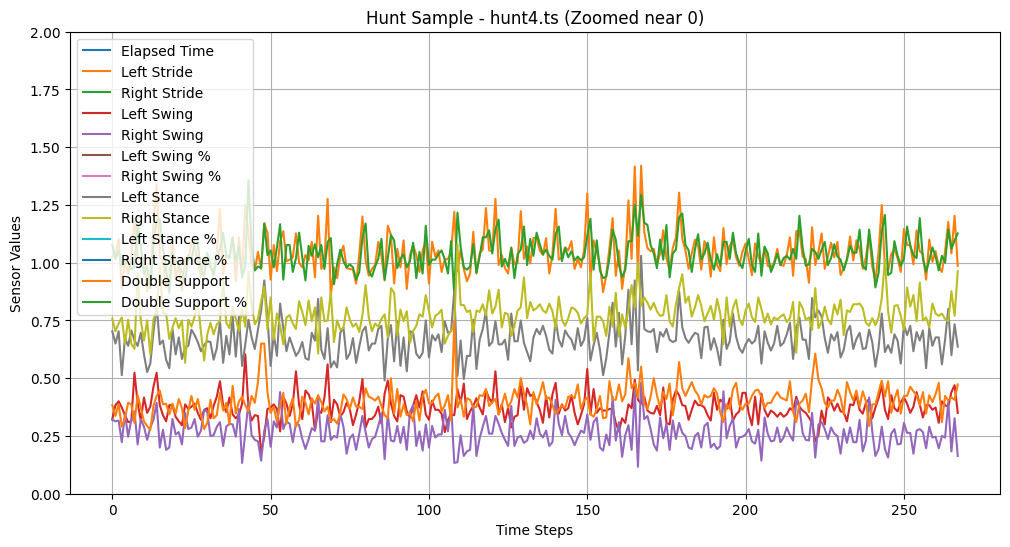

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/ts_files/ts_files/hunt4.ts', delimiter='\t', header=None)

df.columns=df1.columns
# Plot same as above zoomed in near 0
plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df[col], label=f'{col}')

plt.title('Hunt Sample - hunt4.ts (Zoomed near 0)')
plt.xlabel('Time Steps')
plt.ylabel('Sensor Values')
plt.ylim(0, 2)
plt.legend()
plt.grid(True)
plt.show()


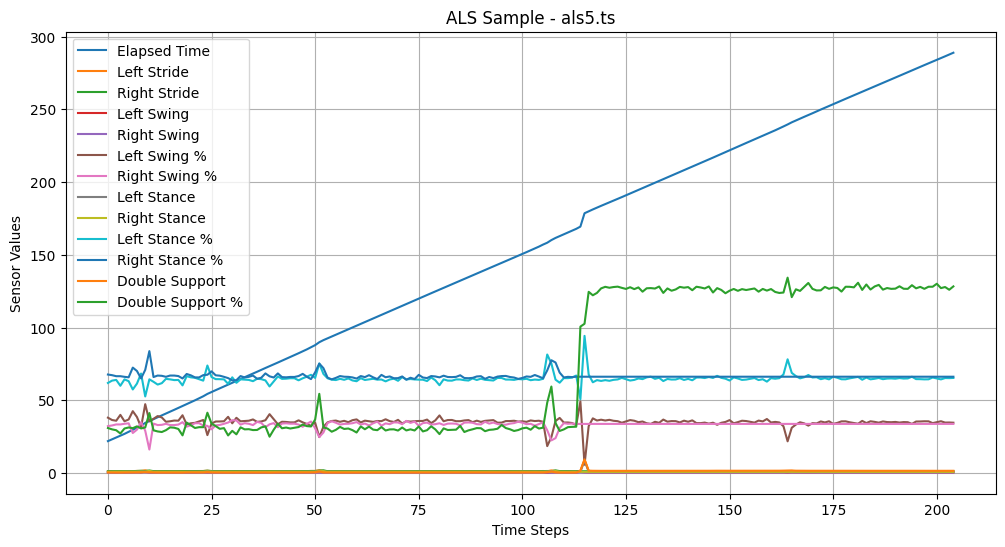

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load one signal
df = pd.read_csv('/content/ts_files/ts_files/als5.ts', delimiter='\t', header=None)

df.columns=df1.columns
plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df[col], label=f'{col}')
plt.title('ALS Sample - als5.ts')
plt.xlabel('Time Steps')
plt.ylabel('Sensor Values')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
df['Double Support %']

0       30.96
1       30.03
2       29.43
3       27.20
4       30.63
        ...  
200    130.11
201    127.12
202    127.87
203    125.99
204    128.30
Name: Double Support %, Length: 205, dtype: float64

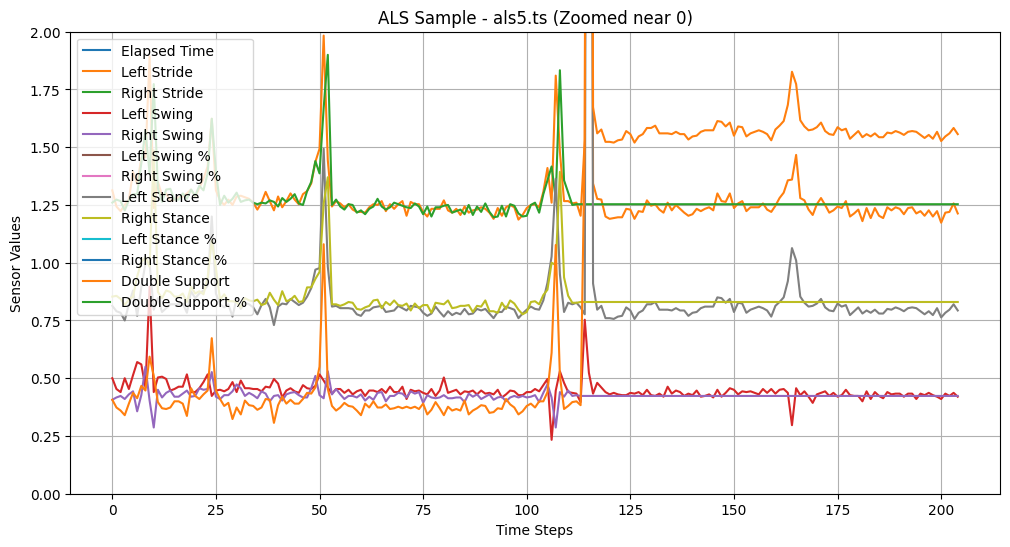

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/ts_files/ts_files/als5.ts', delimiter='\t', header=None)

df.columns=df1.columns
# Plot same as above zoomed in near 0
plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df[col], label=f'{col}')

plt.title('ALS Sample - als5.ts (Zoomed near 0)')
plt.xlabel('Time Steps')
plt.ylabel('Sensor Values')
plt.ylim(0, 2)
plt.legend()
plt.grid(True)
plt.show()


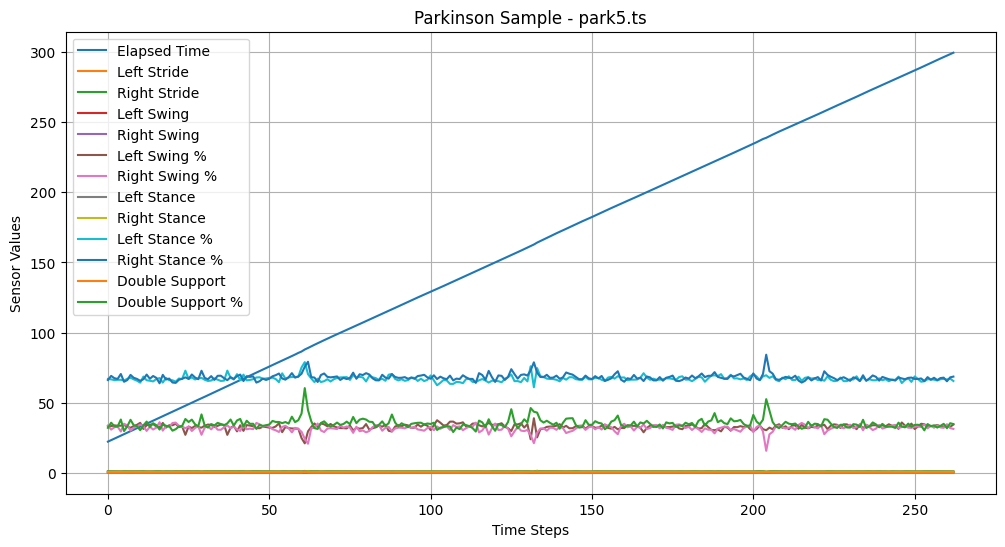

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load one signal
df = pd.read_csv('/content/ts_files/ts_files/park5.ts', delimiter='\t', header=None)

df.columns=df1.columns
plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df[col], label=f'{col}')
plt.title('Parkinson Sample - park5.ts')
plt.xlabel('Time Steps')
plt.ylabel('Sensor Values')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
import os
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

data_folder = '/content/ts_files/ts_files'

diseases = {
    'als': 'ALS',
    'park': 'Parkinsons',
    'control': 'Control',
    'hunt': 'Huntingtons'
}

columns = [
    "Time", "Left_Stride", "Right_Stride", "Left_Swing", "Right_Swing",
    "Left_Swing_%", "Right_Swing_%", "Left_Stance", "Right_Stance",
    "Left_Stance_%", "Right_Stance_%", "Double_Support", "Double_Support_%"
]

all_data = []

ts_files = glob(os.path.join(data_folder, "*.ts"))

# timestamp files of every person concatenated into single dataframe
for file in ts_files:
    file_name = os.path.basename(file).lower()
    for key, disease_name in diseases.items():
        if key in file_name:
            df = pd.read_csv(file, sep="\t", header=None, names=columns)
            df['Subject'] = file_name.split('.')[0]
            df['Disease'] = disease_name
            all_data.append(df)
            break


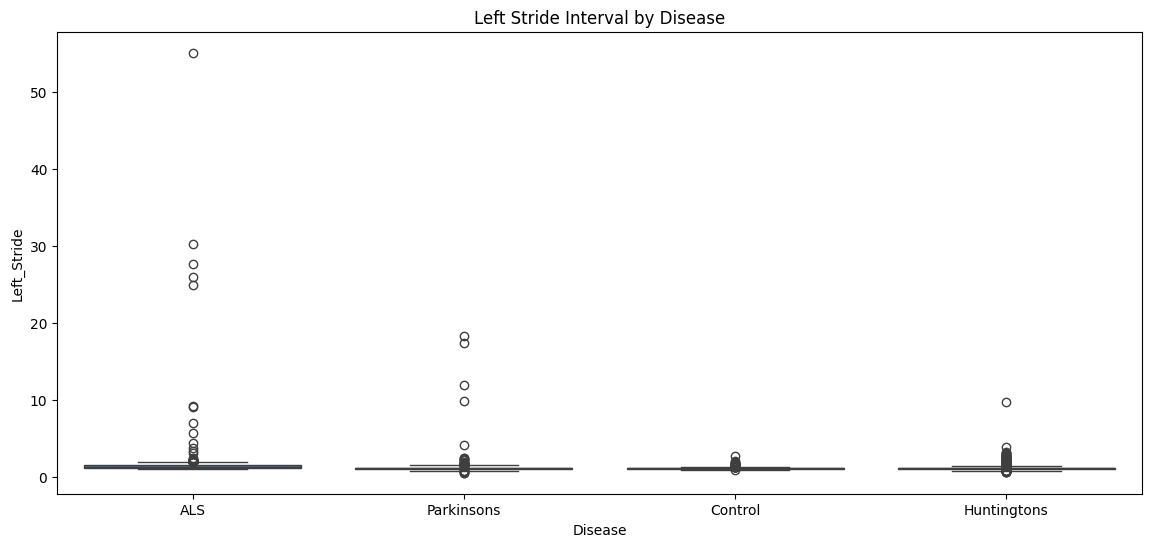

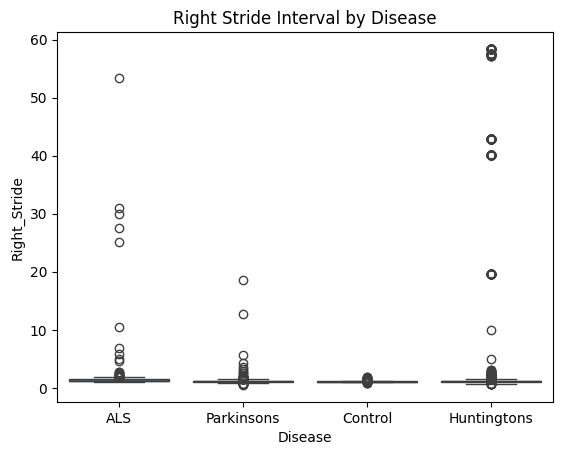

In [14]:
plt.figure(figsize=(14, 6))
import seaborn as sns
import pandas as pd

# left and right stride plot of every person category (disease) wise
data = pd.concat(all_data, ignore_index=True)

sns.boxplot(data=data, x='Disease', y='Left_Stride')
plt.title('Left Stride Interval by Disease')
plt.show()

sns.boxplot(data=data, x='Disease', y='Right_Stride')
plt.title('Right Stride Interval by Disease')
plt.show()

In [15]:
data.groupby('Disease')['Left_Stride'].count()


Disease
ALS            2550
Control        4076
Huntingtons    4846
Parkinsons     3688
Name: Left_Stride, dtype: int64

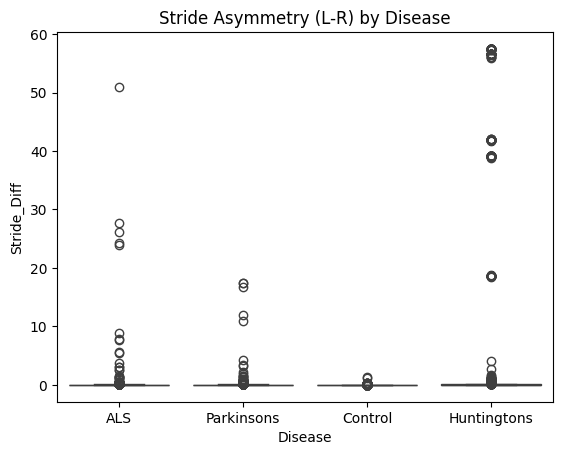

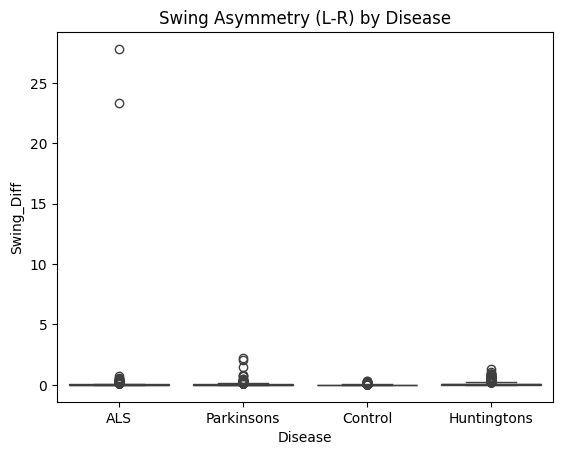

In [16]:
data['Stride_Diff'] = abs(data['Left_Stride'] - data['Right_Stride'])
data['Swing_Diff'] = abs(data['Left_Swing'] - data['Right_Swing'])

sns.boxplot(data=data, x='Disease', y='Stride_Diff')
plt.title('Stride Asymmetry (L-R) by Disease')
plt.show()

sns.boxplot(data=data, x='Disease', y='Swing_Diff')
plt.title('Swing Asymmetry (L-R) by Disease')
plt.show()


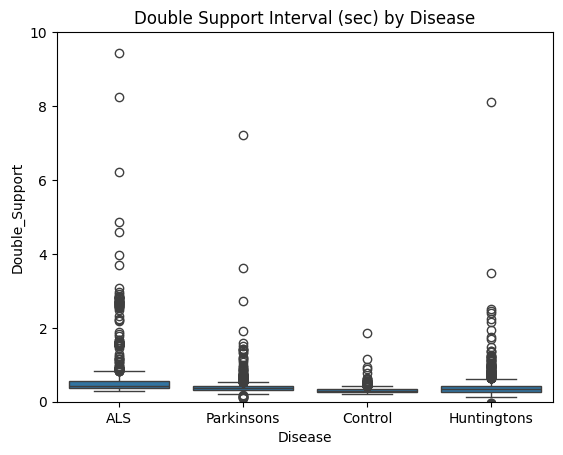

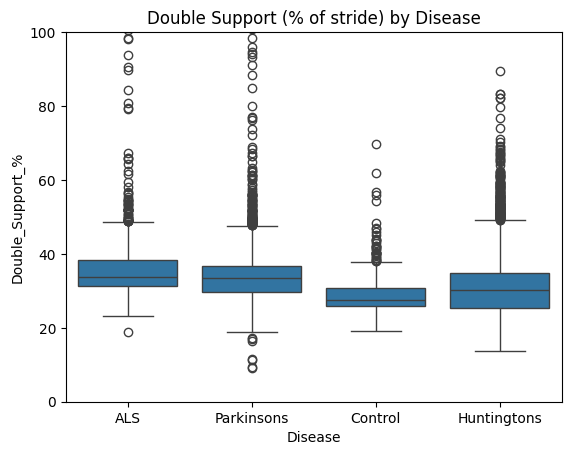

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# double support plot of every person category (disease) wise
sns.boxplot(data=data, x='Disease', y='Double_Support')
plt.title('Double Support Interval (sec) by Disease')
plt.ylim(0,10)

plt.show()

sns.boxplot(data=data, x='Disease', y='Double_Support_%')
plt.title('Double Support (% of stride) by Disease')
plt.ylim(0,100)
plt.show()


In [18]:
print(type(all_data))
print(len(all_data))
print(all_data[0].head())


<class 'list'>
64
      Time  Left_Stride  Right_Stride  Left_Swing  Right_Swing  Left_Swing_%  \
0  22.1933       1.1333        1.1500      0.3867       0.4000         34.12   
1  23.3733       1.1800        1.1600      0.3900       0.4000         33.05   
2  24.5967       1.2233        1.1933      0.4067       0.3867         33.24   
3  25.7800       1.1833        1.2400      0.3900       0.4367         32.96   
4  26.9600       1.1800        1.1567      0.4000       0.4100         33.90   

   Right_Swing_%  Left_Stance  Right_Stance  Left_Stance_%  Right_Stance_%  \
0          34.78       0.7467        0.7500          65.88           65.22   
1          34.48       0.7900        0.7600          66.95           65.52   
2          32.40       0.8167        0.8067          66.76           67.60   
3          35.22       0.7933        0.8033          67.04           64.78   
4          35.45       0.7800        0.7467          66.10           64.55   

   Double_Support  Double_Suppor

In [19]:
import os
import pandas as pd
from glob import glob

data_folder = '/content/ts_files/ts_files'

disease_map = {
    'als': 'ALS',
    'park': 'Parkinsons',
    'control': 'Control',
    'hunt': 'Huntingtons'
}

columns = [
    "Time", "Left_Stride", "Right_Stride", "Left_Swing", "Right_Swing",
    "Left_Swing_%", "Right_Swing_%", "Left_Stance", "Right_Stance",
    "Left_Stance_%", "Right_Stance_%", "Double_Support", "Double_Support_%"
]

all_data = []

files = glob(os.path.join(data_folder, "*.ts"))
for file_path in files:
    filename = os.path.basename(file_path).lower()
    for key, disease_name in disease_map.items():
        if key in filename:
            df = pd.read_csv(file_path, sep='\t', header=None, names=columns)
            df['Subject'] = filename.split('.')[0]
            df['Disease'] = disease_name
            all_data.append(df)
            break

data = pd.concat(all_data, ignore_index=True)

print("Diseases found:", data['Disease'].unique())
print(data['Disease'].value_counts())


Diseases found: ['ALS' 'Parkinsons' 'Control' 'Huntingtons']
Disease
Huntingtons    4846
Control        4076
Parkinsons     3688
ALS            2550
Name: count, dtype: int64


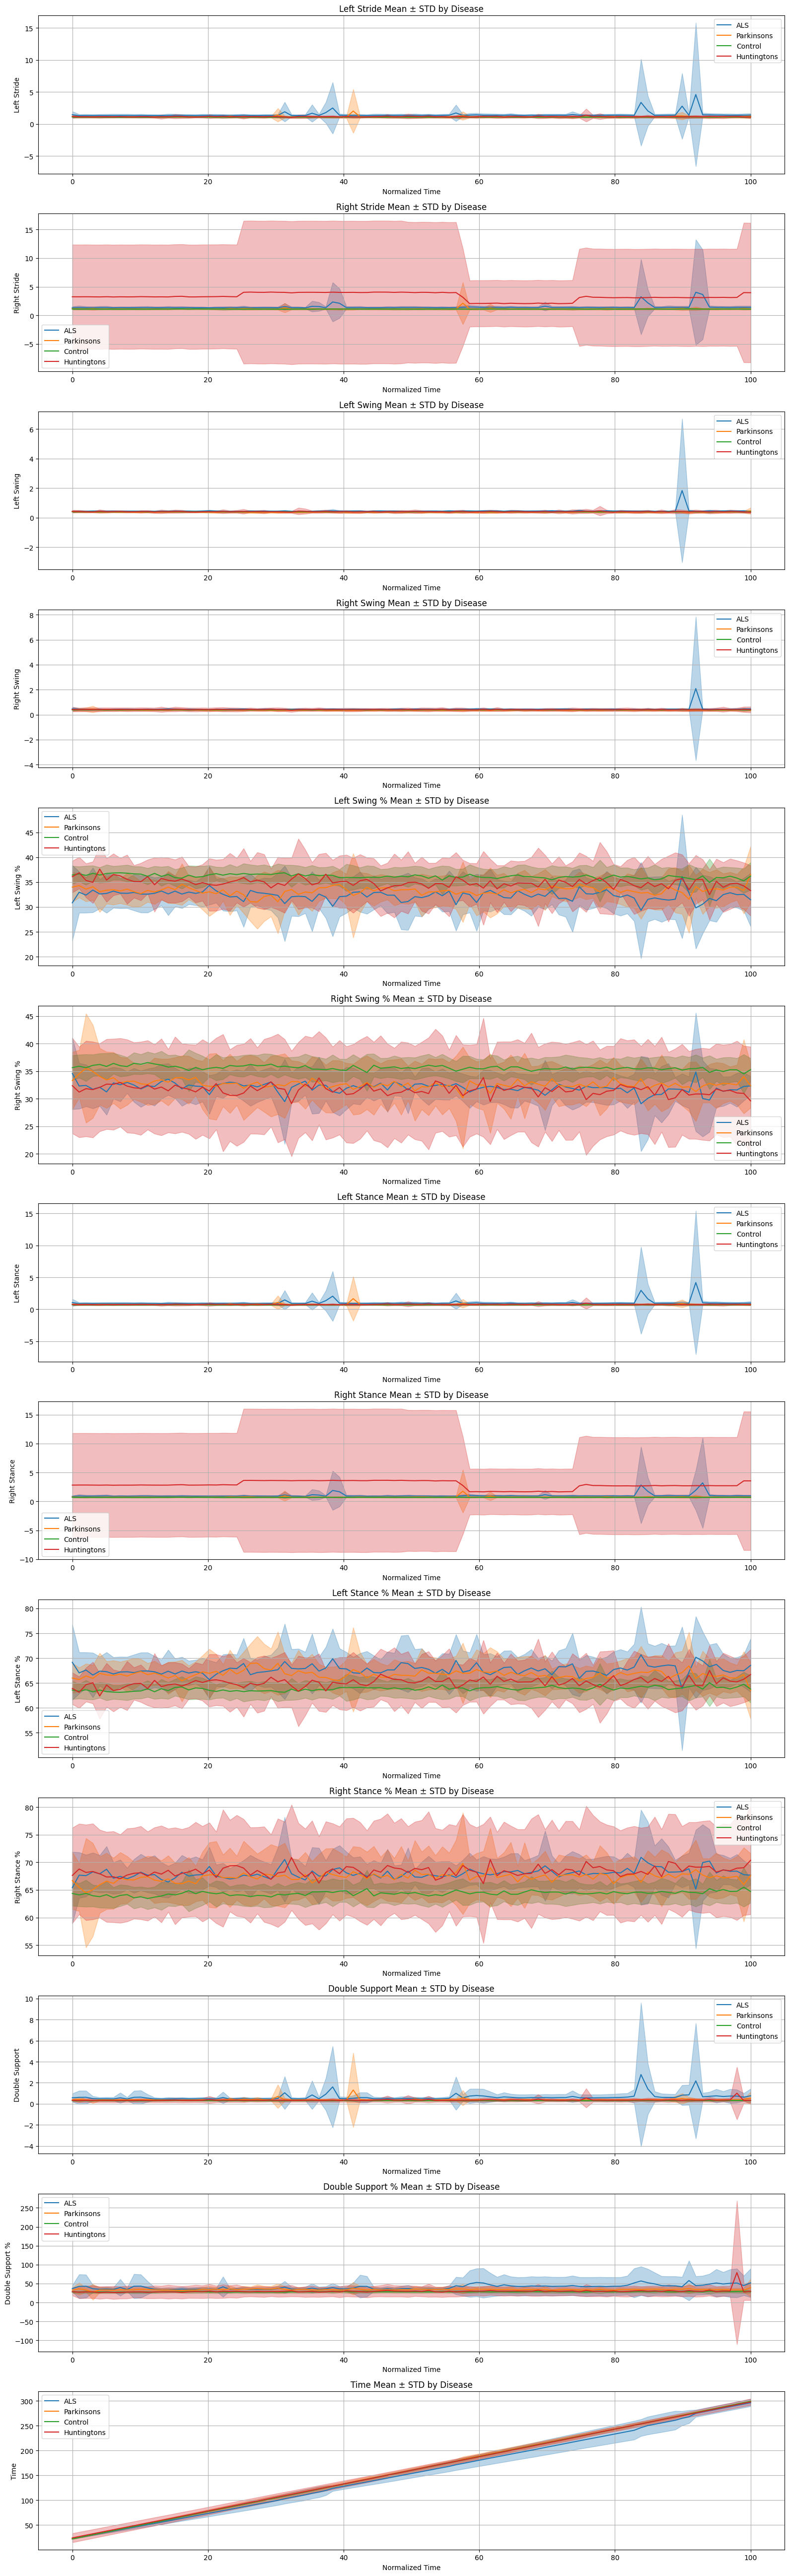

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

features = [
    "Left_Stride", "Right_Stride",
    "Left_Swing", "Right_Swing",
    "Left_Swing_%", "Right_Swing_%",
    "Left_Stance", "Right_Stance",
    "Left_Stance_%", "Right_Stance_%",
    "Double_Support", "Double_Support_%",
    "Time"
]

diseases = ['ALS','Parkinsons', 'Control', 'Huntingtons']
colors = sns.color_palette("tab10", n_colors=len(diseases))

plt.figure(figsize=(16, 4 * len(features)))

# iterating through each column
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
# for each feature, iterating through all diseses
    for j, disease in enumerate(diseases):
        df_disease = data[data['Disease'] == disease]

        subjects = df_disease['Subject'].unique()
        subj_means = []
        # for each disease iterating through all the subjects
        for subject in subjects:
            df_sub = df_disease[df_disease['Subject'] == subject]
            values = df_sub[feature].values
            if len(values) == 0:
                continue
            x_orig = np.linspace(0, 1, len(values))
            x_new = np.linspace(0, 1, 100)
            interp_vals = np.interp(x_new, x_orig, values)
            subj_means.append(interp_vals)

        if len(subj_means) == 0:
            continue

        subj_means = np.array(subj_means)
        mean_curve = subj_means.mean(axis=0)
        std_curve = subj_means.std(axis=0)

        x_plot = np.linspace(0, 100, 100)
        plt.plot(x_plot, mean_curve, label=disease, color=colors[j])
        plt.fill_between(x_plot, mean_curve - std_curve, mean_curve + std_curve,
                         color=colors[j], alpha=0.3)

    plt.title(f'{feature.replace("_", " ")} Mean ± STD by Disease')
    plt.xlabel('Normalized Time')
    plt.ylabel(feature.replace("_", " "))
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [21]:
print(data['Disease'].unique())
print(data['Disease'].value_counts())


['ALS' 'Parkinsons' 'Control' 'Huntingtons']
Disease
Huntingtons    4846
Control        4076
Parkinsons     3688
ALS            2550
Name: count, dtype: int64


In [22]:
import pandas as pd

# displaying every person's non gait data in form of a dataframe
subject_metadata = pd.read_csv("subject-description.txt", sep="\t")

subject_metadata.columns = [col.strip().replace(" ", "_").replace("(", "").replace(")", "") for col in subject_metadata.columns]

print(subject_metadata.head())


  Unnamed:_0    GROUP  AGEYRS  HEIGHTmeters Weightkg gender GaitSpeedm/sec  \
0   control1  control    57.0          1.94       95      f           1.33   
1   control2  control    22.0          1.94       70      m           1.47   
2   control3  control    23.0          1.83       66      f           1.44   
3   control4  control    52.0          1.78       73      f           1.54   
4   control5  control    47.0          1.94       82      f           1.54   

   Duration/Severity  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  


In [23]:
import os
import pandas as pd
import numpy as np

subject_info = pd.read_csv('/content/subject-description.txt', sep='\t')
subject_info['GROUP'] = subject_info['GROUP'].str.lower()

all_data = []
# feature enginnering - going through each file of person, and getting asymmetry feature from each
for file in os.listdir('/content/ts_files/ts_files'):
    if file.endswith('.ts'):
        subject_id = file.replace('.ts', '').lower()
        print(f"Reading: {file} --> ID: {subject_id}")

        #getting disease name from person file name
        prefix = ''.join([char for char in subject_id if char.isalpha()])

        subject_row = subject_info[subject_info['GROUP'] == prefix]
        if subject_row.empty:
            print(f"No metadata found for group: {prefix}")
            continue

        subject_meta = subject_row.iloc[0].to_dict()

        #df is dataframe of each person
        df = pd.read_csv(f'/content/ts_files/ts_files/{file}', sep='\t', header=None)
        df.columns = [
            'Elapsed Time', 'Left Stride', 'Right Stride',
            'Left Swing', 'Right Swing', 'Left Swing %', 'Right Swing %',
            'Left Stance', 'Right Stance', 'Left Stance %', 'Right Stance %',
            'Double Support', 'Double Support %'
        ]
        # gait asymmetry - used to calculate abnormalities in people with diseases
        # 3 asymmetry values calculated for every person and named under the following columns
        df['Stride Asym'] = np.abs(df['Left Stride'] - df['Right Stride']) / ((df['Left Stride'] + df['Right Stride']) / 2)
        df['Swing Asym'] = np.abs(df['Left Swing'] - df['Right Swing']) / ((df['Left Swing'] + df['Right Swing']) / 2)
        df['Stance Asym'] = np.abs(df['Left Stance'] - df['Right Stance']) / ((df['Left Stance'] + df['Right Stance']) / 2)

        #ID of person column added to every person's dataframe
        for key, value in subject_meta.items():
            df[key] = value
        df['SubjectID'] = subject_id

        #all dataframes concatenated into single one
        all_data.append(df)

if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)
    combined_df.to_csv('combined_gait_data.csv', index=False)
    print("Combined data shape:", combined_df.shape)
    print("Saved to: combined_gait_data.csv")
else:
    print("No data was combined. Check if metadata is matched correctly.")


Reading: als11.ts --> ID: als11
Reading: park4.ts --> ID: park4
Reading: park12.ts --> ID: park12
Reading: control1.ts --> ID: control1
Reading: control13.ts --> ID: control13
Reading: control10.ts --> ID: control10
Reading: control15.ts --> ID: control15
Reading: control12.ts --> ID: control12
Reading: control4.ts --> ID: control4
Reading: hunt9.ts --> ID: hunt9
Reading: als10.ts --> ID: als10
Reading: hunt5.ts --> ID: hunt5
Reading: hunt13.ts --> ID: hunt13
Reading: hunt18.ts --> ID: hunt18
Reading: hunt10.ts --> ID: hunt10
Reading: control2.ts --> ID: control2
Reading: als12.ts --> ID: als12
Reading: als7.ts --> ID: als7
Reading: als9.ts --> ID: als9
Reading: control5.ts --> ID: control5
Reading: hunt1.ts --> ID: hunt1
Reading: hunt16.ts --> ID: hunt16
Reading: hunt14.ts --> ID: hunt14
Reading: control8.ts --> ID: control8
Reading: control16.ts --> ID: control16
Reading: park11.ts --> ID: park11
Reading: als3.ts --> ID: als3
Reading: park8.ts --> ID: park8
Reading: control3.ts --> I

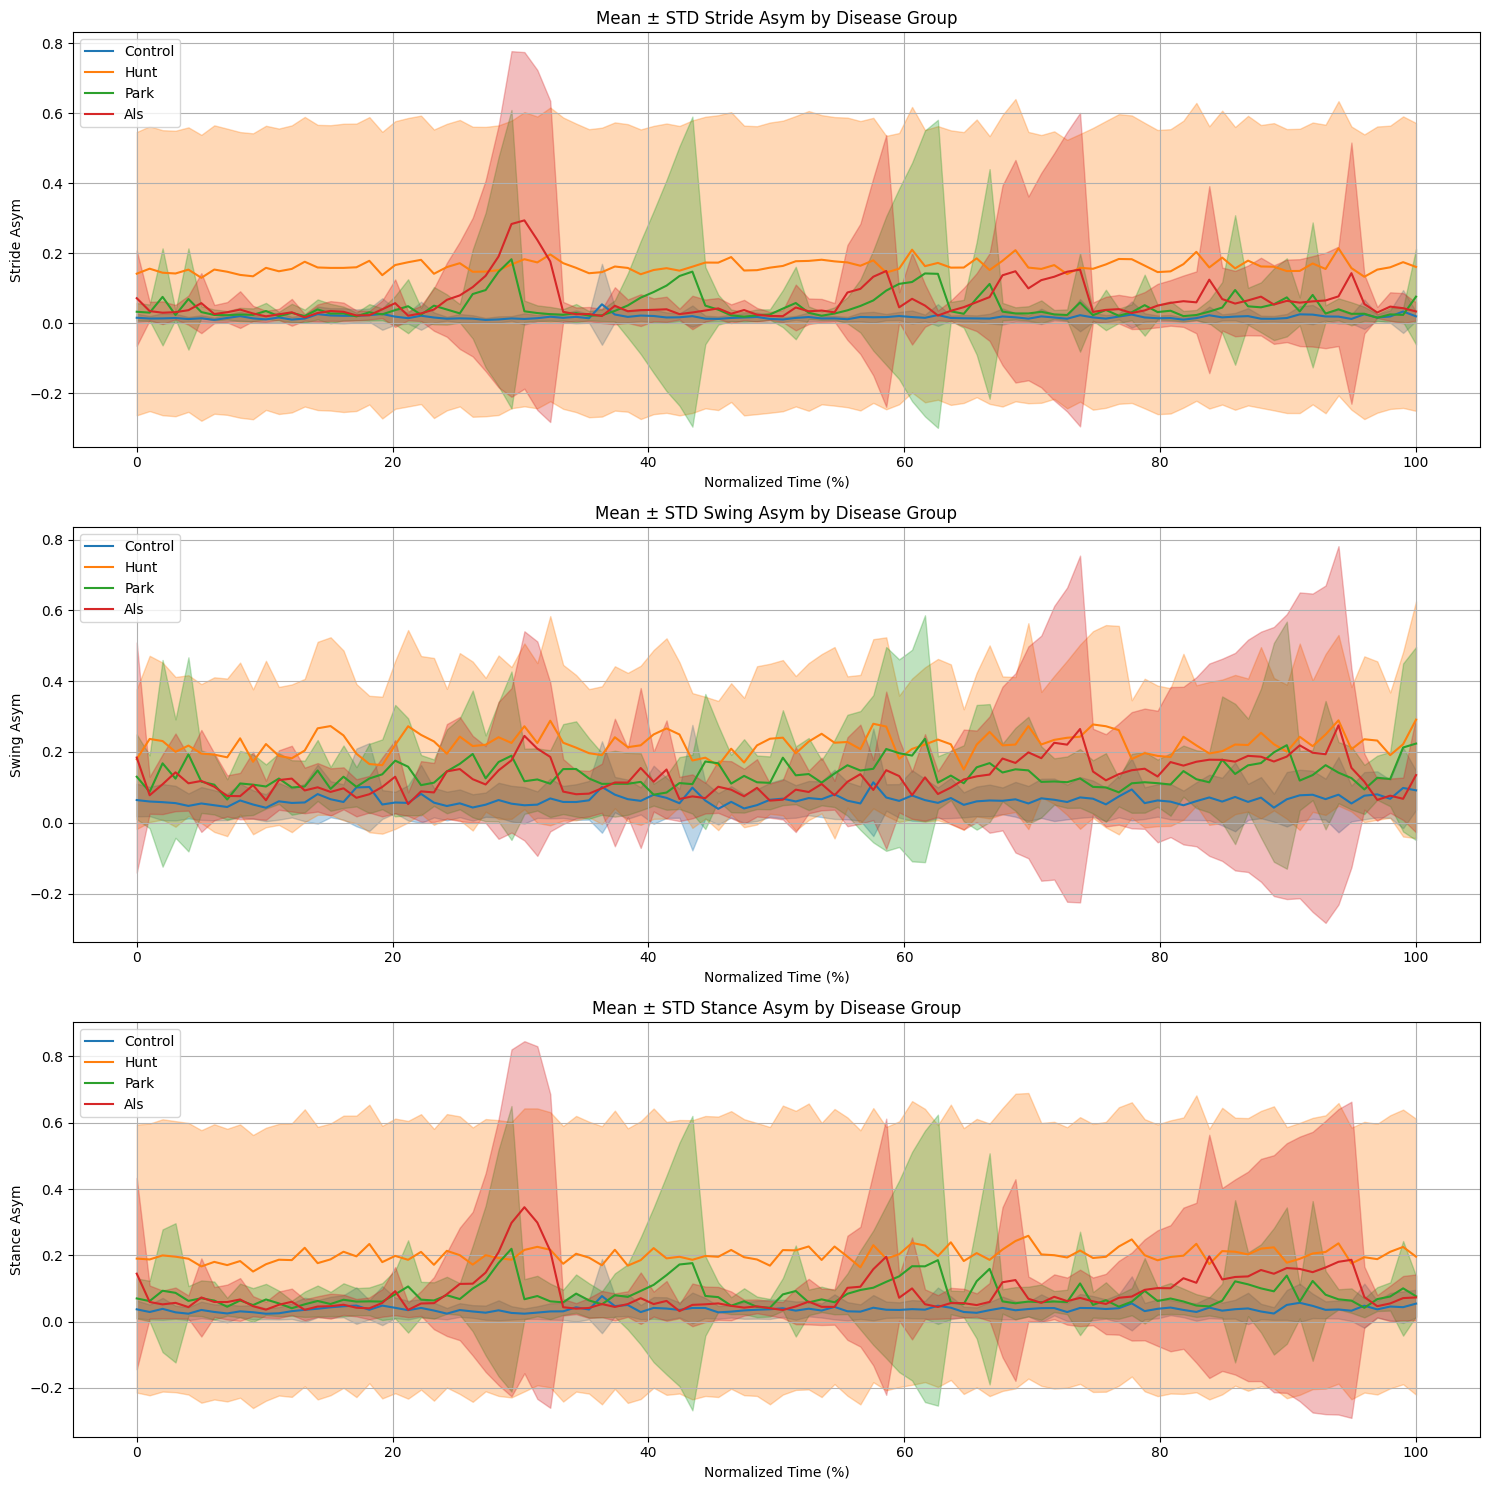

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# similar plots as of that above - with newly derived features (asymmetry)
features = ['Stride Asym', 'Swing Asym', 'Stance Asym']
groups = ['control', 'hunt','park','als']
colors = sns.color_palette("tab10", n_colors=len(groups))

plt.figure(figsize=(15, 5 * len(features)))

for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)

    for j, group in enumerate(groups):
        subset = combined_df[combined_df['GROUP'] == group]

        subjects = subset['SubjectID'].unique()
        subject_curves = []

        for subject in subjects:
            sub_data = subset[subset['SubjectID'] == subject]

            x_orig = sub_data['Elapsed Time'].values
            y_orig = sub_data[feature].values

            if len(x_orig) == 0:
                continue

            x_norm = (x_orig - x_orig.min()) / (x_orig.max() - x_orig.min())

            x_new = np.linspace(0, 1, 100)
            y_interp = np.interp(x_new, x_norm, y_orig)
            subject_curves.append(y_interp)

        if len(subject_curves) == 0:
            continue

        subject_curves = np.array(subject_curves)
        mean_curve = subject_curves.mean(axis=0)
        std_curve = subject_curves.std(axis=0)

        plt.plot(x_new * 100, mean_curve, label=group.capitalize(), color=colors[j])
        plt.fill_between(x_new * 100, mean_curve - std_curve, mean_curve + std_curve, color=colors[j], alpha=0.3)

    plt.title(f'Mean ± STD {feature} by Disease Group')
    plt.xlabel('Normalized Time (%)')
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [25]:
#all data combined into single dataframe along with newly derived features
df = pd.read_csv('combined_gait_data.csv')
df.head()


Elapsed Time  Left Stride  Right Stride  Left Swing  Right Swing  \
0       22.1933       1.1333        1.1500      0.3867       0.4000   
1       23.3733       1.1800        1.1600      0.3900       0.4000   
2       24.5967       1.2233        1.1933      0.4067       0.3867   
3       25.7800       1.1833        1.2400      0.3900       0.4367   
4       26.9600       1.1800        1.1567      0.4000       0.4100   

   Left Swing %  Right Swing %  Left Stance  Right Stance  Left Stance %  ...  \
0         34.12          34.78       0.7467        0.7500          65.88  ...   
1         33.05          34.48       0.7900        0.7600          66.95  ...   
2         33.24          32.40       0.8167        0.8067          66.76  ...   
3         32.96          35.22       0.7933        0.8033          67.04  ...   
4         33.90          35.45       0.7800        0.7467          66.10  ...   

   Stance Asym  Unnamed: 0  GROUP  AGE(YRS)  HEIGHT(meters)  Weight(kg)  \
0     0.004410        als1    als      68.0           1.803       86.18   
1     0.038710        als1    als      68.0           1.803       86.18   
2     0.012320        als1    als      68.0           1.803       86.18   
3     0.012527        als1    als      68.0           1.803       86.18   
4     0.043624        als1    als      68.0           1.803       86.18   

  gender GaitSpeed(m/sec)  Duration/Severity  SubjectID  
0      m            1.302                1.0      als11  
1      m            1.302                1.0      als11  
2      m            1.302                1.0      als11  
3      m            1.302                1.0      als11  
4      m            1.302                1.0      als11  

[5 rows x 25 columns]

In [26]:
# Access and print the column names
print(df.columns)

Index(['Elapsed Time', 'Left Stride', 'Right Stride', 'Left Swing',
       'Right Swing', 'Left Swing %', 'Right Swing %', 'Left Stance',
       'Right Stance', 'Left Stance %', 'Right Stance %', 'Double Support',
       'Double Support %', 'Stride Asym', 'Swing Asym', 'Stance Asym',
       'Unnamed: 0', 'GROUP', 'AGE(YRS)', 'HEIGHT(meters)', 'Weight(kg)',
       'gender', 'GaitSpeed(m/sec)', 'Duration/Severity', 'SubjectID'],
      dtype='object')


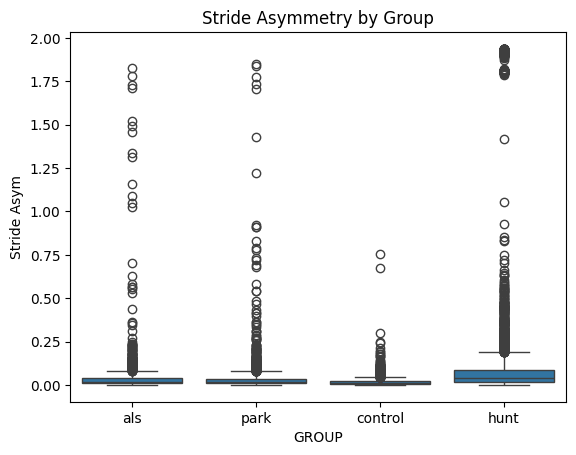

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

#plotting stride asymmetry of every person category wise
sns.boxplot(x='GROUP', y='Stride Asym', data=df)
plt.title('Stride Asymmetry by Group')
plt.show()


In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import pandas as pd

# removing non essential features for training
X = df.drop(columns=['GROUP', 'SubjectID', 'gender', 'Unnamed: 0'], errors='ignore')
print(X.columns)

X = pd.get_dummies(X)
# print(X)

y = LabelEncoder().fit_transform(df['GROUP'])

# standard scalar converts X distribution in such a way that mean = 0 and standard deviation =1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# shape X compatable with cnn
X_cnn = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(
    X_cnn, y, test_size=0.3, random_state=42, stratify=y
)

model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_cnn.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),  # Helps reduce overfitting
    Dense(len(np.unique(y)), activation='softmax')  # Output layer
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Index(['Elapsed Time', 'Left Stride', 'Right Stride', 'Left Swing',
       'Right Swing', 'Left Swing %', 'Right Swing %', 'Left Stance',
       'Right Stance', 'Left Stance %', 'Right Stance %', 'Double Support',
       'Double Support %', 'Stride Asym', 'Swing Asym', 'Stance Asym',
       'AGE(YRS)', 'HEIGHT(meters)', 'Weight(kg)', 'GaitSpeed(m/sec)',
       'Duration/Severity'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7455 - loss: 0.6757 - val_accuracy: 0.9948 - val_loss: 0.0199
Epoch 2/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9962 - loss: 0.0262 - val_accuracy: 0.9986 - val_loss: 0.0088
Epoch 3/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9979 - loss: 0.0158 - val_accuracy: 0.9995 - val_loss: 0.0017
Epoch 4/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9982 - loss: 0.0081 - val_accuracy: 0.9986 - val_loss: 0.0033
Epoch 5/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9992 - loss: 0.0026 - val_accuracy: 0.9991 - val_loss: 0.0074
Epoch 6/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9986 - loss: 0.0073 - val_accuracy: 0.9986 - val_loss: 0.0060
Epoch 7/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9991 - loss: 0.0061 - val_accuracy: 1.0000 - val_loss: 5.8941e-04
Epoch 8/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Accuracy
print(f"Test Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=LabelEncoder().fit(df['GROUP']).classes_))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Test Accuracy Score: 0.9993

Classification Report:
              precision    recall  f1-score   support

         als       1.00      1.00      1.00       765
     control       1.00      1.00      1.00      1223
        hunt       1.00      1.00      1.00      1454
        park       1.00      1.00      1.00      1106

    accuracy                           1.00      4548
   macro avg       1.00      1.00      1.00      4548
weighted avg       1.00      1.00      1.00      4548


Confusion Matrix:
[[ 764    0    0    1]
 [   0 1222    0    1]
 [   1    0 1453    0]
 [   0    0    0 1106]]


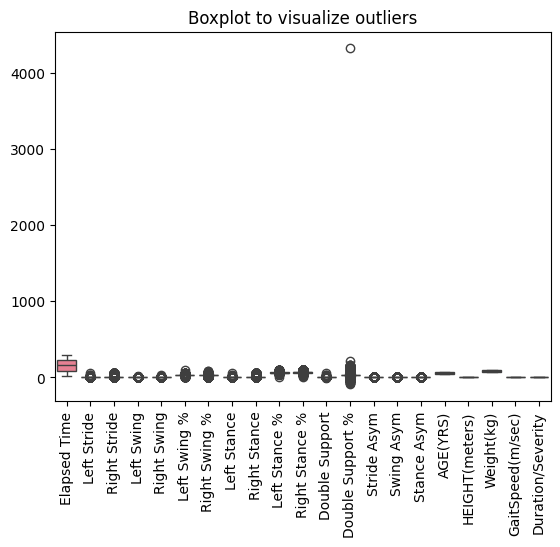

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.title("Boxplot to visualize outliers")
plt.show()


In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df.drop(columns=['GROUP', 'SubjectID', 'gender', 'Unnamed: 0'], errors='ignore')
X = pd.get_dummies(X)

y = LabelEncoder().fit_transform(df['GROUP'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_cnn = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    X_cnn, y, test_size=0.2
)

In [32]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train_cnn[:,:,0], y_train_cnn)
svm_preds = svm.predict(X_test_cnn[:,:,0])

print("\nSVM Accuracy:", accuracy_score(y_test_cnn, svm_preds))



SVM Accuracy: 0.9983509234828496


In [33]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_cnn[:,:,0], y_train_cnn)
rf_preds = rf.predict(X_test_cnn[:,:,0])

print("\nRandom Forest Accuracy:", accuracy_score(y_test_cnn, rf_preds))


Random Forest Accuracy: 1.0


In [34]:
rf_preds

array([1, 1, 1, ..., 2, 1, 2])

In [35]:
!pip install lime

In [36]:
print("True labels in y_test:")
print(pd.Series(y_test_cnn).value_counts())




True labels in y_test:
2    961
1    800
3    766
0    505
Name: count, dtype: int64


In [37]:
import numpy as np
import pandas as pd

y_pred = model.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)

print("Unique predicted classes:", np.unique(y_pred_labels))

print("Prediction distribution:\n", pd.Series(y_pred_labels).value_counts())

143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Unique predicted classes: [0 1 2 3]
Prediction distribution:
 2    1453
1    1222
3    1108
0     765
Name: count, dtype: int64


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


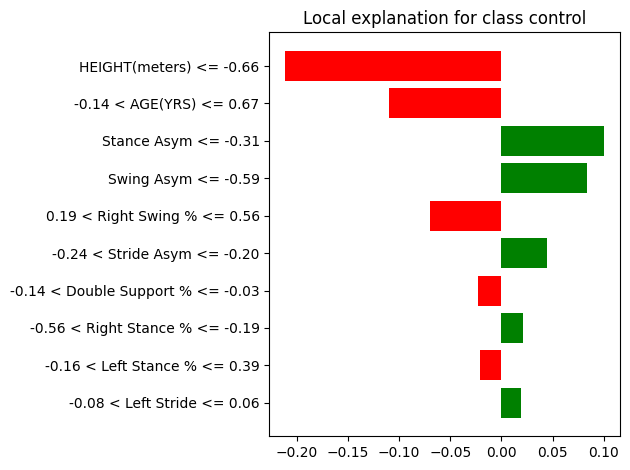

In [38]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf # Import tensorflow



X = df.drop(columns=['GROUP', 'SubjectID', 'gender', 'Unnamed: 0'])
X = pd.get_dummies(X)
y = LabelEncoder().fit_transform(df['GROUP'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

num_features = X_scaled.shape[1]
X_cnn = X_scaled.reshape((X_scaled.shape[0], num_features, 1))


X_train, X_test, y_train, y_test = train_test_split(
    X_cnn, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)
le = LabelEncoder()
y_encoded = le.fit_transform(df['GROUP'])



X_train_2D, X_test_2D, y_train_lime, y_test_lime = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, shuffle=True, stratify=y_encoded
)


def predict_fn(input_array):

    num_features_2d = input_array.shape[1]
    reshaped_input = input_array.reshape((input_array.shape[0], num_features_2d, 1))
    return model.predict(reshaped_input)



explainer = LimeTabularExplainer(
    X_train_2D,
    feature_names=X.columns.tolist(),
    class_names=le.classes_.tolist(),
    discretize_continuous=True
)

exp = explainer.explain_instance(X_test_2D[50], predict_fn, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()
plt.show()

In [39]:
from google.colab import files
files.download("/content/combined_gait_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
X_cnn.shape[1]

21

In [80]:
!pip install lime
